In [1]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

In [2]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [3]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

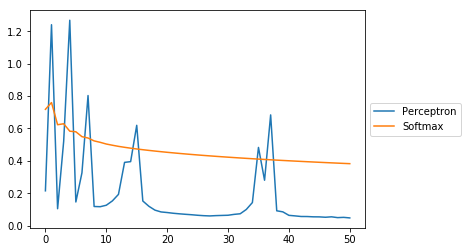

69
0.9012875536480687
74
0.894134477825465


In [26]:
# load in dataset
csvname = datapath + 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:] 
x0 = np.insert(x,0,1,axis=0)
gp = perceptron_cost
gs = softmax
w = 0.1*np.random.randn(9,1) 
max_its = 50
alpha = 10**(-1)
weight_historyP, cost_historyP = gradient_descent(gp,alpha,max_its,w)
weight_historyS, cost_historyS = gradient_descent(gs,alpha,max_its,w)
yfitP = model(x0,weight_historyP[-1])
for i in range(0,len(yfitP.T)):
    if(yfitP.T[i]> 0):
        yfitP.T[i] = 1
    else:
        yfitP.T[i] = -1
yfitS = model(x0,weight_historyS[-1])
for i in range(0,len(yfitS.T)):
    if(yfitS.T[i]> 0):
        yfitS.T[i] = 1
    else:
        yfitS.T[i] = -1
plot_cost_histories([cost_historyP,cost_historyS],labels = ["Perceptron","Softmax"])
for k in range(max_its):
    misP,accuracyP = identity_func(yfitP,y)
for k in range(max_its):
    misS,accuracyS = identity_func(yfitS,y)

print(misP)
print(accuracyP)
print(misS)
print(accuracyS)




  Perceptron has a better accuracy than softmax cost function.

In [4]:
def model(x0,w):
    a =  np.dot(x0.T,w)
    return a.T

In [5]:
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x0,w))))
    return cost/float(np.size(y))

In [18]:
def identity_func(yfit,y):
    no_of_miscalc = 0;
    for i in range(0,y.size):
        if(yfit.T[i] != y.T[i]):
            no_of_miscalc +=1
    accuracy = 1- no_of_miscalc/float(y.size)
    return no_of_miscalc,accuracy

In [22]:
def perceptron_cost(w):
    a = model(x0,w)
    cost = 0
    for i in range(0,np.size(y)):
        cost +=max(0,-y[0][i]*a[0][i])
    return cost/float(np.size(y))